In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

plt.style.use("tableau-colorblind10")

font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

In [80]:
books_2021 = pd.read_excel("BookLog.xlsx", header = 0)

In [81]:
books_2021.head()

,Year,Month,Title,Author_Last1,Author_First1,Unnamed: 5,Unnamed: 6,Author Gender,Fiction,BIPOC,Asian,Queer,YA,Memoir,Graphic Novel
0,2021,1,Memorial,Washington,Bryan,NaN,NaN,M,Y,Y,Y,Y,N,N,N
1,2021,1,Who I Was with Her,Tyndall,Nita,NaN,NaN,NB,Y,N,N,Y,Y,N,N
2,2021,1,Know My Name,Miller,Chanel,NaN,NaN,W,N,N,Y,N,N,Y,N
3,2021,1,The Bean Trees,Barbara,Kingsolver,NaN,NaN,W,Y,N,N,N,N,N,N
4,2021,2,I Hate Everyone But You,Raskin,Allison,Dunn,Gaby,NB,Y,N,N,Y,Y,N,N


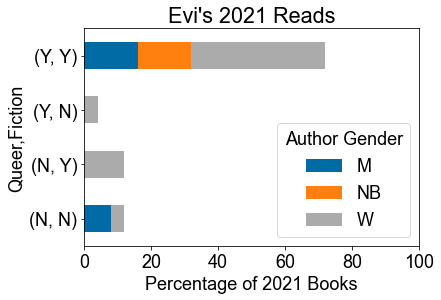

In [82]:
books_plot_1 = books_2021.groupby(["Queer","Fiction"])["Author Gender"].value_counts().unstack()\
.apply(lambda x: x/(books_2021.shape[0])*100).plot(kind = "barh",stacked = True)

books_plot_1.set(xlabel = "Percentage of 2021 Books", title = "Evi's 2021 Reads", xlim = [0,100])

plt.show()

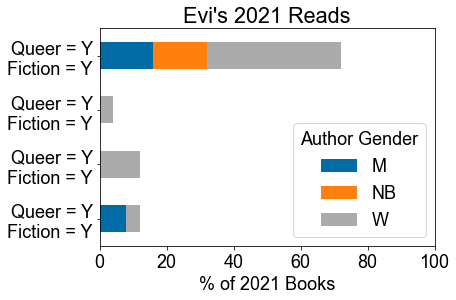

In [85]:
books_plot_2 = books_2021.groupby(["Queer","Fiction"])["Author Gender"].value_counts().unstack()\
.apply(lambda x: x/(books_2021.shape[0])*100).plot(kind = "barh",stacked = True)

y_labs = list(books_plot_2.get_ylabel().split(","))

new_labels = []

for i in books_plot_2.get_yticklabels():

    l_out = [c for c in range(len(list(i.get_text()))) if list(i.get_text())[c] in ["Y","N"]]
    
    new_out = [y_labs[j] + " = Y" if out_v[l_out[j]] =="Y"\
               else y_labs[j] + " = N" for j in range(len(l_out)) ]

    new_labels.append(new_out[0] + "\n" + new_out[1])

books_plot_2.set(ylabel = None, xlabel = "% of 2021 Books", xlim = [0,100],\
                 title = "Evi's 2021 Reads", yticklabels = new_labels)
plt.show()